In [1]:
import satellite_images_nso.api.nso_georegion as nso

# Search for satellite images in geojson and download links

In [14]:
# give path to geojson en output,!!!!! rewrite these directories to your file system!!!!
path_geojson = "C:/repos/github/satellite_images_nso/input_data/ortho_wgs.geojson"
output_path = "C:/repos/github/satellite_images_nso/output"

nso_username = 'micwin'
nso_password = 'REDACTED'

# This method fetches all the download links to all the satelliet images which contain region in the geojson
georegion = nso.nso_georegion(path_geojson,output_path,\
***REMOVED***nso_username,\
                            nso_password)

In [3]:
links = georegion.retrieve_download_links()

In [4]:
links

['https://api.satellietdataportaal.nl/v1/download/Tri_ruw/20180423_094807_Tri',
 'https://api.satellietdataportaal.nl/v1/download/Spot67_RD_8bit_RGB_150cm/20140611_102721_142_Sp6',
 'https://api.satellietdataportaal.nl/v1/download/Spot67_RD_8bit_RGB_150cm/20141210_102814_325_Sp6',
 'https://api.satellietdataportaal.nl/v1/download/Spot67_RD_8bit_RGB_150cm/20140904_102422_264_Sp6',
 'https://api.satellietdataportaal.nl/v1/download/Spot67_RD_8bit_RGB_150cm/20150414_101507_129_Sp6',
 'https://api.satellietdataportaal.nl/v1/download/Spot67_RD_8bit_RGB_150cm/20150611_102001_91_Sp6',
 'https://api.satellietdataportaal.nl/v1/download/Tri_RD_12bit_RGBI_320cm/20180726_093749_Tri',
 'https://api.satellietdataportaal.nl/v1/download/Tri_ruw/20180726_093749_Tri',
 'https://api.satellietdataportaal.nl/v1/download/Tri_RD_8bit_RGB_80cm/20180726_093749_Tri',
 'https://api.satellietdataportaal.nl/v1/download/Tri_RD_12bit_RGBI_80cm/20180726_093749_Tri',
 'https://api.satellietdataportaal.nl/v1/download/SV

# Crop and calculate NDVI

## For a specific image

In [ ]:
# Downloads a satellite image from the NSO, makes a crop out of it so it fits the geojson region and calculates the NVDI index.
# The output will stored in the designated output folder.

image = links[0]
georegion.execute_link(image)

# The parameters are : execute_link(self, link, delete_zip_file = False,delete_source_files = True, 
# check_if_file_exists = True)

Starting download to: C:/repos/github/satellite_images_nso/output/20180423_094807_Tri_Tri_ruw.zip


## For a group of images 

In [ ]:
# loop through and download all the 200cm resolution SuperView images
for link in links:
    if 'SV' in link and '200cm' in link:
        print(link)
        try:
            georegion.execute_link(link)
        except Exception as e:
            print(e)

In [ ]:
# loop through and download all the 200cm Trisat images
for link in links:
    if 'Tri' in link and "80cm" in link and "8bit" in link:
        try:
            georegion.execute_link(link)
        except Exception as e:
            print(e)

## Multi date relative normalisation.

In [1]:
# Imports the normalisation library.
from satellite_images_nso.__normalisation import normalisation

# Path to a Superview satellite image.
path = "20190401_111723_SV1-04_200cm_RD_11bit_RGBI_DenHaag_solleveld_sweco_cropped.tif"


normalisation.multidate_normalisation_75th_percentile(path)


-------- Multi-date Relative Normalisation for file: 
C:/repos/github/satellite_images_nso/output/20190401_111723_SV1-04_200cm_RD_11bit_RGBI_DenHaag_solleveld_sweco_cropped.tif
Saving file to:
C:/repos/github/satellite_images_nso/output/20190401_111723_SV1-04_200cm_RD_11bit_RGBI_DenHaag_solleveld_sweco_cropped_Spring_normalised.tif


<Figure size 1400x700 with 2 Axes>

## Black spot normalisation.

In [ ]:
from satellite_images_nso.__normalisation import normalisation

In [ ]:
path = "C:/repos/github/satellite_images_nso/data_satellite/20210302_111341_SV1-03_SV_RD_11bit_RGBI_200cm_Brouwersdam_Grevelingen_21_cropped.tif"

Using local coefficients
-------- Dark Spot Normalisation for file: 
C:/repos/github/satellite_images_nso/data_satellite/20210302_111341_SV1-03_SV_RD_11bit_RGBI_200cm_Brouwersdam_Grevelingen_21_cropped.tif
20210302
105 153 91 64
Saving file to:
C:/repos/github/satellite_images_nso/data_satellite/20210302_111341_SV1-03_SV_RD_11bit_RGBI_200cm_Brouwersdam_Grevelingen_21_cropped_dark_point_normalised.tif


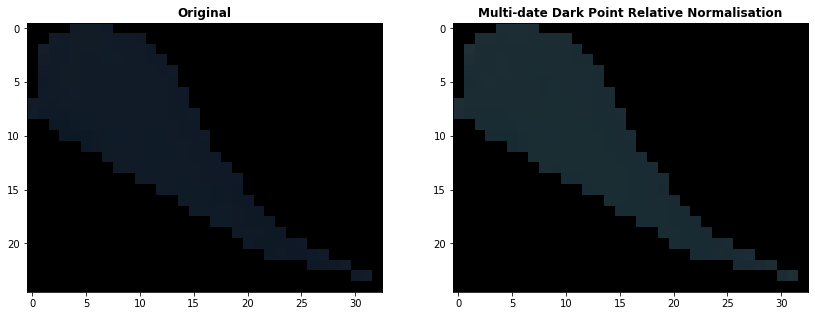

In [8]:
normalisation.multi_date_dark_spot_normalisation(path,"20210302")

# Other functionalities

In [ ]:
# The sat_manipulator gives other handy transmations on satellite data.
import satellite_images_nso.api.sat_manipulator as sat_manipulator

# This function reads a .tif file, which is a format the satellite data is stored in,  and converts it to a pixel based geopandas dataframe.
# For machine learning purposes.
path_to_vector = "path/to/folder/*.tif"
geo_df_pixel = sat_manipulator.tranform_vector_to_pixel_gpdf(path_to_vector)